In [68]:
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.image
import cv2
from matplotlib import pyplot as plt

In [85]:

canvas_width, canvas_height = 1024, 1024
canvas = np.zeros((canvas_width, canvas_height, 3), dtype=np.uint8)
canvas.fill(255)

#img = cv2.imread('test.jpg', 0)
img = np.asarray(Image.open('test.jpg'), dtype=np.uint8)
#img = img.convert('RGB')
#img = matplotlib.image.imread('img.png')
#img =  np.array(img*255, dtype=np.uint8)
img_width, img_height, _ = img.shape

padding_vertical = (canvas_height - img_height) // 2
padding_horizontal = (canvas_width - img_width) // 2

canvas[padding_horizontal: padding_horizontal+img_width, padding_vertical: padding_vertical+img_height,:] =  img

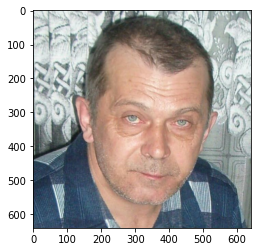

In [86]:
plt.imshow(img, )
plt.show()

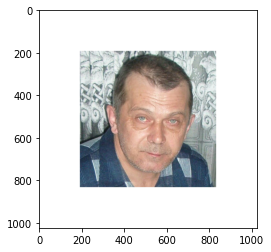

In [87]:
plt.imshow(canvas)
plt.show()

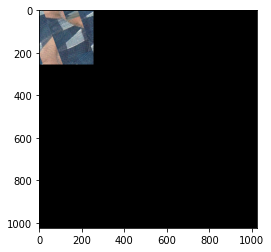

In [91]:
def apply_transformation(array, transformation_matrix):
    img_transformed = np.empty(array.shape, dtype=np.uint8)
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            pixel_data = img[i, j, :]
            input_coords = np.array([i, j, 1])
            i_out, j_out, _ = np.array(transformation_matrix @ input_coords, dtype=np.uint8)
            img_transformed[i_out, j_out, :] = pixel_data
    return  img_transformed


def translate(array, tx, ty):
    transformation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(array, transformation_matrix)
    #rgb_matrix = np.stack((matrix_sample, matrix_sample, matrix_sample))
    #print(rgb_matrix.shape)

def rotate(array, angle):
    angle = np.radians(angle)
    transformation_matrix = np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])
    return apply_transformation(array, transformation_matrix)

#plt.imshow(translate(canvas, 900, 500))
plt.imshow(rotate(canvas, 290))
plt.show()

In [62]:
plt.imshow(apply_translation(canvas, 100, 200))
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2048)

In [51]:
matrix = np.array([
    [1, 0, 222],
    [0, 1, 222],
    [0, 0, 1]
])
reshaped = np.stack((matrix, matrix, matrix))
reshaped

array([[[  1,   0, 222],
        [  0,   1, 222],
        [  0,   0,   1]],

       [[  1,   0, 222],
        [  0,   1, 222],
        [  0,   0,   1]],

       [[  1,   0, 222],
        [  0,   1, 222],
        [  0,   0,   1]]])